In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = main()

Elapsed time to compute data loading: 0 minutes and 0 seconds
Elapsed time to compute data cleaning: 0 minutes and 6 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE imputation: 0 minutes and 0 seconds
Elapsed time to compute MICE i

In [3]:
data.head()

,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A woman,)","(Q2- How old are you?_30 to 39 years old,)","(Q2- How old are you?_40 to 44 years old,)","(Q2- How old are you?_45 to 49 years old,)","(Q2- How old are you?_50 to 55 years old,)",...,"(Q62- Do you take sleeping pills, anxiolytics or anti-depressants:_Once a month,)","(Q62- Do you take sleeping pills, anxiolytics or anti-depressants:_Several times a month,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_Never,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_often,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_permanently,)","(Q63- Over the past 12 months have you experienced the following difficulties?-Sleep disorders (difficulty falling asleep, waking up at night, waking up early without being able to go back to sleep, etc.)_sometimes,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_Never,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_often,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_permanently,)","(Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_sometimes,)"
0,0.0,0.0,0.0,0.0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.0,0.0,0.0,0.0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2.0,0.0,0.0,0.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0.0,0.0,0.0,0.0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0.0,0.0,2.0,2.0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [4]:
data.info()
data.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44535 entries, 0 to 44534
Columns: 315 entries, Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you? to ('Q63- Over the past 12 months have you experienced the following difficulties?-A lack of tone_sometimes',)
dtypes: float64(4), int64(311)
memory usage: 107.0 MB


<bound method NDFrame.describe of        Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?  \
0                                                    0.0                                                                   
1                                                    0.0                                                                   
2                                                    2.0                                                                   
3                                                    0.0                                                                   
4                                                    0.0                                                                   
...                                                  ...                                                                   
44530                                                0.0                                          

In [5]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [15]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [16]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(314, 44535)

In [17]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean')

np.shape(linked)

(313, 4)

In [18]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')

df_linked.head(10)

,c1,c2,distance,size
0,35,144,124.802071,2
1,192,197,156.960055,2
2,146,150,176.440925,2
3,147,151,177.886106,2
4,174,176,179.702824,2
5,189,196,180.696276,2
6,51,55,188.753047,2
7,148,152,188.876358,2
8,175,318,191.453536,3
9,74,75,192.293933,2


Text(0, 0.5, "Ward's distance")

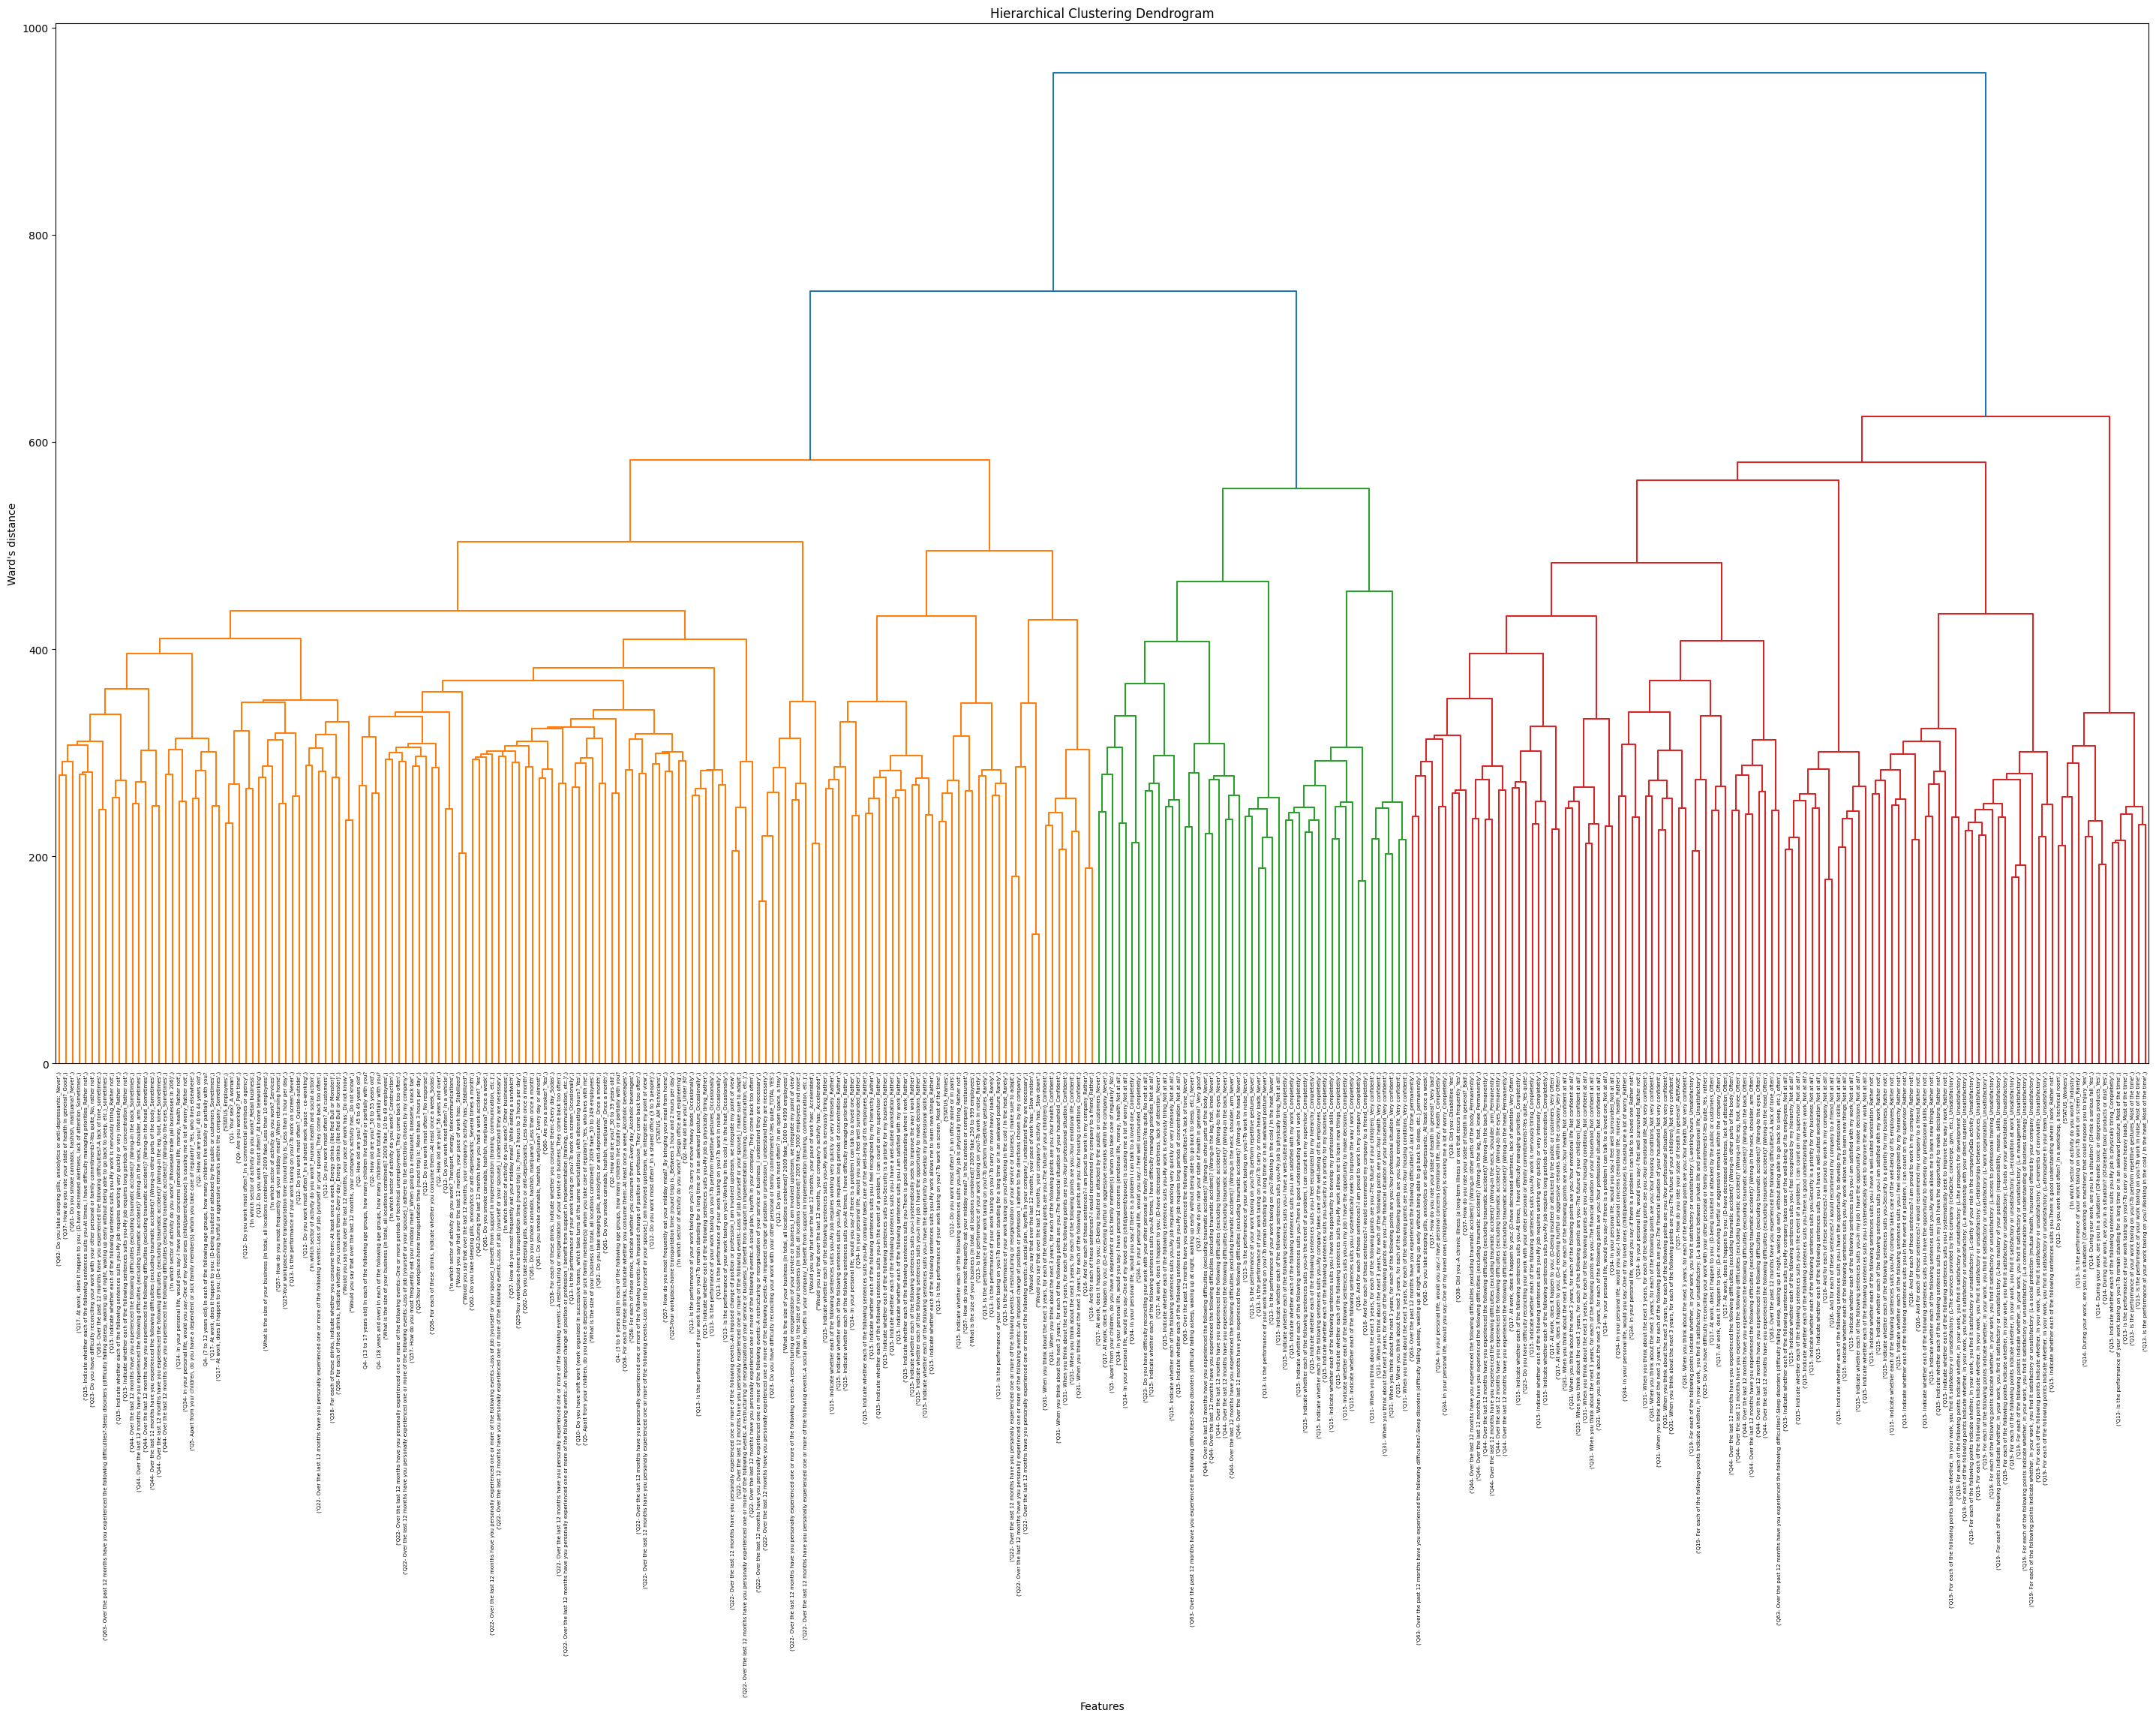

In [19]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
# 45 degree angle for x axis labels
plt.xticks(rotation=90)

plt.xlabel('Features')
plt.ylabel("Ward's distance")

In [21]:
num_clusters = 10 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [23]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [24]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,('Q15- Indicate whether each of the following ...,1,0.126,0.126
1,"('STATUS_Workers',)",1,0.123,0.123
2,('Q13- Is the performance of your work taxing ...,1,0.118,0.118
3,"('Q12- Do you work most often?_In a workshop, ...",1,0.115,0.115
4,('Q13- Is the performance of your work taxing ...,1,0.115,0.115
5,('Q13- Is the performance of your work taxing ...,1,0.112,0.112
6,('Q13- Is the performance of your work taxing ...,1,0.112,0.112
7,"('Q14- During your work, are you in a situatio...",1,0.099,0.099
8,('Q13- Is the performance of your work taxing ...,1,0.093,0.093
9,"('Q14- During your work, are you in a situatio...",1,0.088,0.088


In [25]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

Text(0.5, 1.0, 'Cluster 2 and 3')

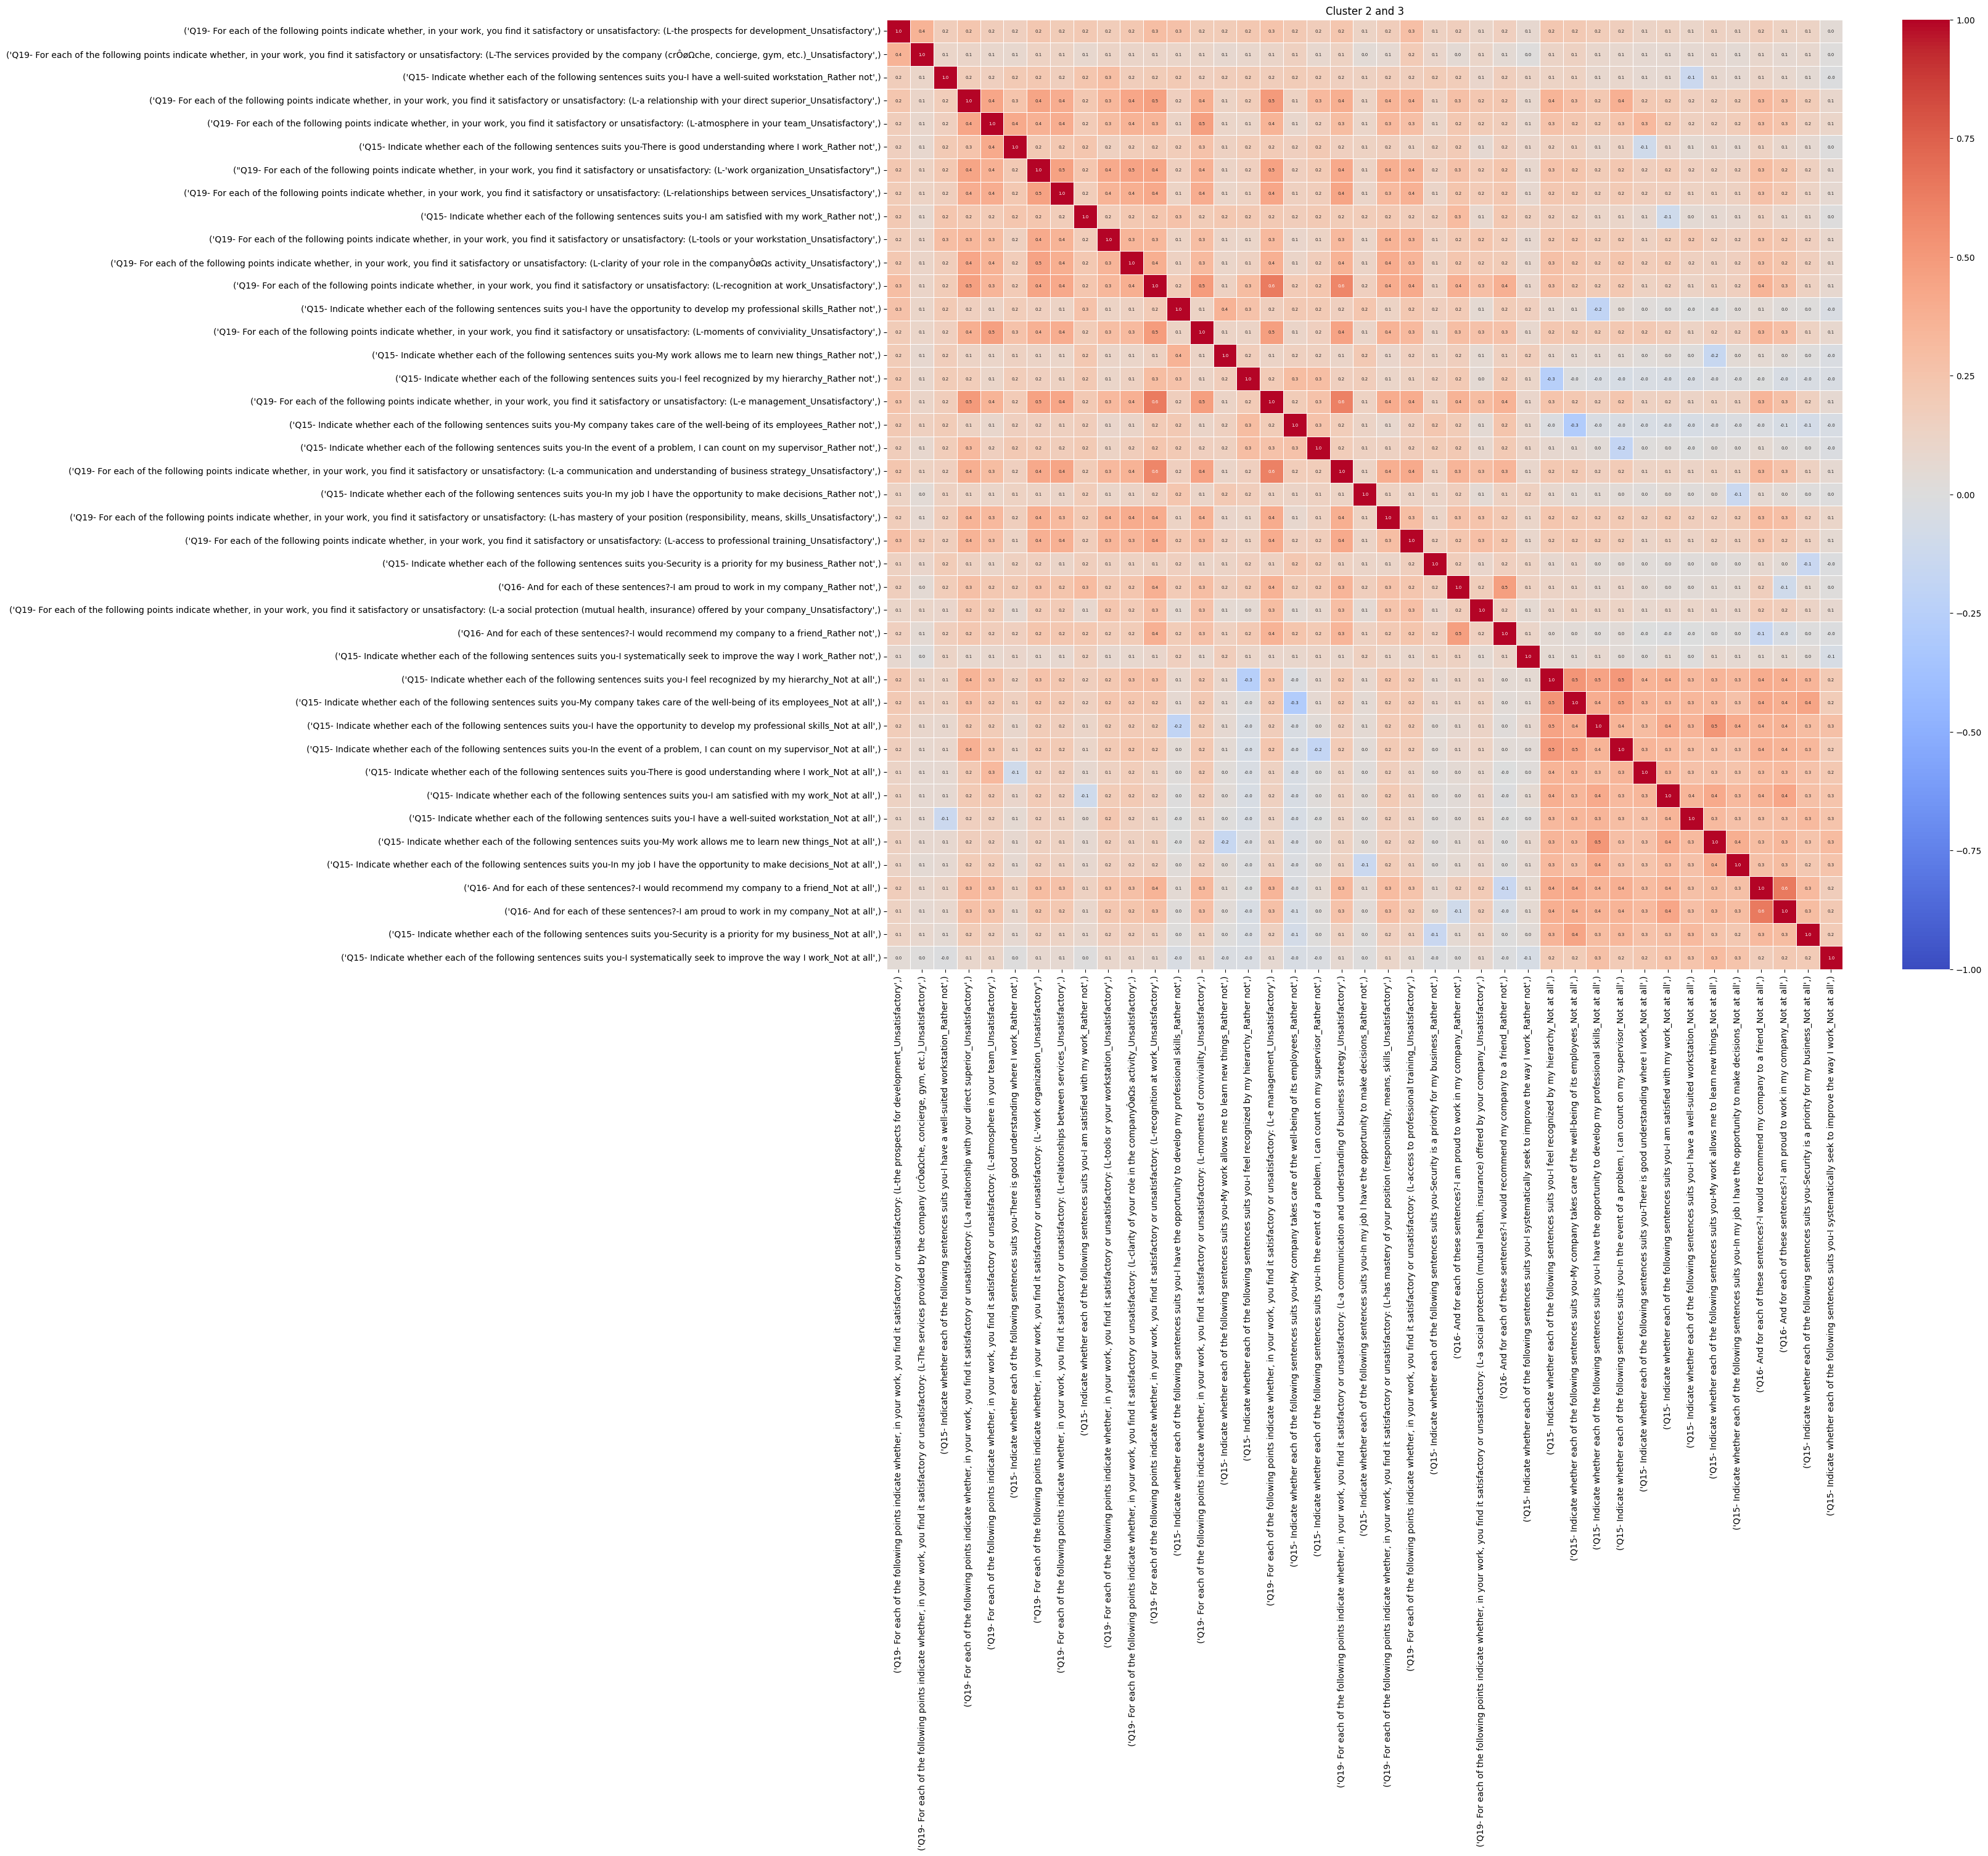

In [27]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True, 
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".1f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.title('Cluster 2 and 3')